<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/auto_timeseries_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install --upgrade statsmodels
!pip install auto_ts
!pip install fbprophet

import logging, sys
logging.disable(sys.maxsize)

In [ ]:
!pip install microprediction

### Hello world univariate
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [33]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:125]

In [40]:
from auto_ts import auto_timeseries
import pandas as pd 
import datetime 

def predict_one(ys:[float])->float:
   """ Predict the next point in a series """
   ATS = auto_timeseries(score_type='rmse', forecast_period=1,
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=0) 
   df_all = pd.DataFrame(columns=['y'],data=list(ys)+[0])
   df_all['ds'] = pd.date_range(start='2021-01-01', periods=len(ys)+1, freq='1M')
   df_train = df_all.head(-1)
   df_test  = df_all.tail(1)

   ATS.fit(df_train,'ds','y')
   forecast = ATS.predict(df_test)
   print('------')
   print(forecast)
   print('------')
   # Now some absurdity to extract prediction
   possible_result_cols = ['mean','yhat']
   for col in possible_result_cols:
     if col in forecast.columns:
       return forecast[col].values[0]   

   
def predict_all(ys):
  """ The slowest way to do it """
  burnin = 100
  y_hats = list()
  for t in range(len(ys)):
     if t>burnin:
        y_hat = predict_one(ys[:t])
     elif t>=1:
        y_hat = ys[t-1]
     else:
        y_hat = 0 
     y_hats.append(y_hat)
  return y_hats 

# Try it...
XS = predict_all(YS)

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: ds sep: , target: y
    Dataframe loaded successfully. Shape of data set = (101, 1)
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5
    RMSE = 3.93
    Std Deviation of Originals = 3.24
    Normalized RMSE = 121%
Cross Validation window: 1 completed
    RMSE = 2.40
    Std Deviation of Originals = 2.30
    Normalized RMSE = 104%
Cross Validation window: 2 completed
    RMSE = 5.28
    Std Deviation of Originals = 4.34
    Normalized RMSE = 122%
Cross Validation window: 3 completed
    RMSE = 3.19
    Std Deviation of Originals = 3.96
    Normalized RMSE = 81%
Cross Validation window: 4 comple

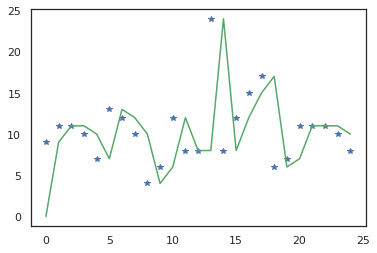

In [41]:
import matplotlib.pyplot as plt
plt.plot(YS[:25],'*b')
plt.plot(XS[:25],'g')